# Preprocesar y limpiar los datos :) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
df = pd.read_csv("popularity.csv")
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id,artist_popularity,artist_followers,extraction_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE,43,180767.0,2025-05-26
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX,51,147674.0,2025-05-26
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u,33,47119.0,2025-05-26


In [64]:
df.shape 
df.columns 
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55950 entries, 0 to 55949
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mbid               55950 non-null  object 
 1   title              55950 non-null  object 
 2   artist             55950 non-null  object 
 3   duration_ms        55565 non-null  float64
 4   genre              55950 non-null  object 
 5   year               55950 non-null  int64  
 6   spotify_id         55950 non-null  object 
 7   popularity         55950 non-null  int64  
 8   release_date       55950 non-null  object 
 9   artist_id          4500 non-null   object 
 10  artist_popularity  4353 non-null   object 
 11  artist_followers   4053 non-null   float64
 12  extraction_date    4200 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 5.5+ MB


In [65]:
df['genre'].unique()

array(['rock', 'pop', 'hip hop', 'electronic'], dtype=object)

In [66]:
df['genre'].value_counts()

genre
rock          25410
pop           19168
hip hop        7397
electronic     3975
Name: count, dtype: int64

In [67]:
df.isnull().sum().sort_values(ascending=False)

artist_followers     51897
extraction_date      51750
artist_popularity    51597
artist_id            51450
duration_ms            385
mbid                     0
title                    0
artist                   0
genre                    0
year                     0
spotify_id               0
popularity               0
release_date             0
dtype: int64

### Eliminar DUplicados

In [68]:
df = df.drop_duplicates()

### Eliminar columnas con demasiodos nulos 

In [69]:
#Eliminar las columnas con muchos nulos
df = df.drop(columns=['artist_followers', 'extraction_date', 'artist_popularity'])

In [70]:
df

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date,artist_id
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01,4SAdMucvHyws4QTeAUsPtE
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01,4SAdMucvHyws4QTeAUsPtE
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27,1189BemPY7h2lgaH1pkzGX
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27,6odEUy7osvwibc1yNvxt5u
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27,6odEUy7osvwibc1yNvxt5u
...,...,...,...,...,...,...,...,...,...,...
55945,0568ccbd-742b-4b61-a634-8735d2f919fb,Let Them Free,Miniman,290000.0,electronic,2016,629sev56ArrmGHed4VDAxN,7,2025-06-19,NaN
55946,a8bbb04a-59aa-42e1-ac2b-e208742001f7,N4,Lance Neptune,320301.0,electronic,2016,50VqWWJRCEXuVsqcbmRf42,1,2025-06-19,NaN
55947,82ae62af-ab2e-41be-af37-3c184d4ad13c,One,Few Nolder,440000.0,electronic,2016,02P4LWHeNnOZxFconGbDnm,19,2025-06-19,NaN
55948,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,Silent Running,Orchestral Manoeuvres in the Dark,222000.0,electronic,2016,5LmR198m65UcHCayrbYeuT,6,2025-06-19,NaN


### Eliminar nulos en columna duración con median 

In [71]:

df['duration_ms'] = df['duration_ms'].fillna(df['duration_ms'].median())

In [72]:
df.isnull().sum().sort_values(ascending=False)

artist_id       51450
mbid                0
title               0
artist              0
duration_ms         0
genre               0
year                0
spotify_id          0
popularity          0
release_date        0
dtype: int64

In [73]:
df[df['artist_id'].isnull()][['artist', 'spotify_id']].sample(10)

,artist,spotify_id
9367,Chris Squire,0OR7hCBpCLndsBB9XqA9QO
33028,Adoro,6PhVzgGVDEcLmqdDh4d1cL
19230,Depeche Mode,75MrfAQwcv6PESAESSwoX5
8926,10cc,1Hiv6Zs3r8aVzgfJvHuoWv
22896,Demi Lovato,7qn5ylWlm2dSZtdCEeMO99
39049,LMNT,6G4dkOMMrfkWLvFol3nCem
15424,Subhumans,2YOIqtI2EBxmP5NCwI0VfA
11436,Steve Jones,6X8vmwEXHUkH5AwBoKqdYY
34705,Santiano,6CckI718B1n2ppBzTe89WP
16043,Alice Cooper,5D2eCwqbHcqOnfHOCM6TnV


### Eliminar duplicados

In [74]:
df = df.drop(columns=['artist_id'])

### Corrección de tipos de datos

In [75]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [76]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [77]:
df.dtypes

mbid                    object
title                   object
artist                  object
duration_ms            float64
genre                   object
year                     int64
spotify_id              object
popularity               int64
release_date    datetime64[ns]
dtype: object

In [78]:
df['duration_min'] = df['duration_ms'] / 60000
df = df.drop(columns=['duration_min'])


In [79]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,Shades of Green (Utah Saints 7″ remix),The Mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,Mr. Pleasant,The Mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,Mono Inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,Someday Somewhere Somehow,To/Die/For,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,Folie á deux,To/Die/For,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [80]:
df.describe()

,duration_ms,year,popularity,release_date
count,5.595000e+04,55950.000000,55950.000000,55535
mean,2.393406e+05,2017.967936,25.591957,2024-04-29 10:14:39.661475072
min,3.000000e+03,2015.000000,0.000000,1962-12-10 00:00:00
25%,1.870000e+05,2016.000000,8.000000,2025-06-08 00:00:00
50%,2.229730e+05,2018.000000,22.000000,2025-06-12 00:00:00
75%,2.691745e+05,2020.000000,39.000000,2025-06-16 00:00:00
max,4.227000e+06,2022.000000,94.000000,2025-06-19 00:00:00
std,1.101093e+05,2.291421,20.935668,NaN


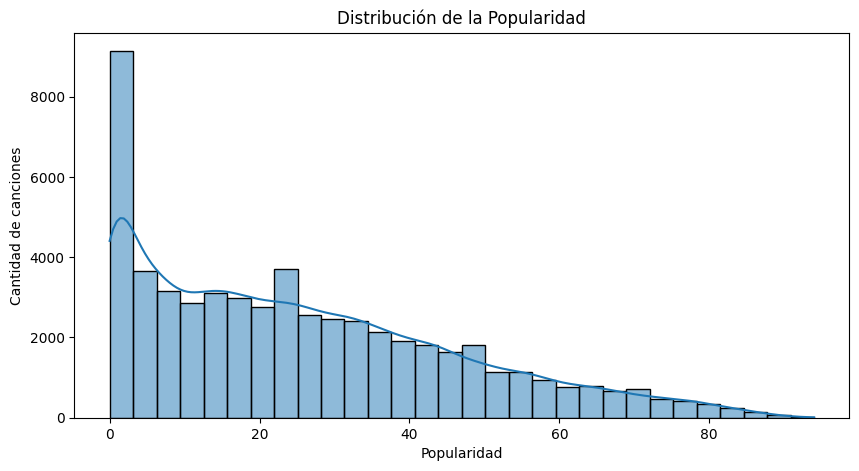

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title("Distribución de la Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Cantidad de canciones")
plt.show()

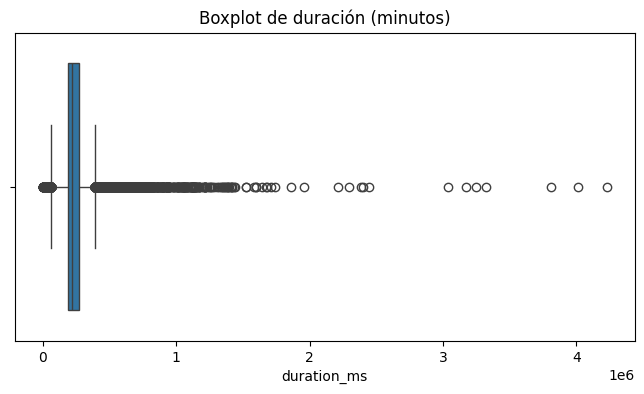

In [82]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['duration_ms'])
plt.title("Boxplot de duración (minutos)")
plt.show()

In [83]:
df = df[df['duration_ms'] <= 900000]

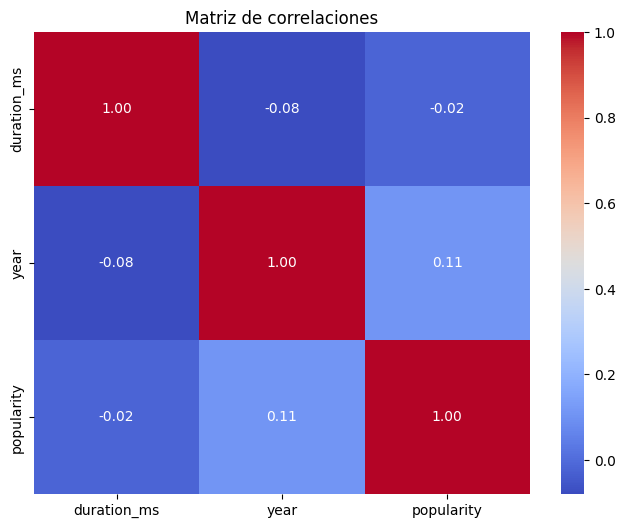

In [84]:
numeric_cols = ['duration_ms', 'year', 'popularity']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [85]:
text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [86]:
df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [87]:
df['popularity'].describe()

count    55794.000000
mean        25.615962
std         20.941730
min          0.000000
25%          8.000000
50%         22.000000
75%         39.000000
max         94.000000
Name: popularity, dtype: float64

In [88]:
df['popularity'].value_counts().sort_index()

popularity
0     4544
1     1843
2     1405
3     1308
4     1165
      ... 
90      16
91       8
92       4
93       1
94       3
Name: count, Length: 95, dtype: int64

In [89]:
df.sort_values(by='popularity', ascending=False)[['title', 'artist', 'popularity']].head(20)

,title,artist,popularity
49414,all the stars,kendrick lamar,94
49743,all the stars,kendrick lamar,94
24004,iris,the goo goo dolls,94
15042,every breath you take,the police,93
25233,end of beginning,djo,92
48997,starboy,the weeknd,92
47988,the night we met,lord huron,92
36823,starboy,the weeknd,92
42921,as it was,harry styles,91
33904,shape of you,ed sheeran,91


In [90]:
top_by_genre = df.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,94
24004,rock,iris,the goo goo dolls,94
36823,pop,starboy,the weeknd,92
54396,electronic,latch,disclosure,85


In [91]:
 df.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,238066.0,rock,2015,5lhyOLtwTpzSAyVlfeafOa,2,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,170506.0,rock,2015,2crKEyAPuOFiP4NRIblZBB,15,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,272000.0,rock,2015,4dfGvNJErGmUgAXnm1KyPW,8,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,399466.0,rock,2015,3oUYUG2VYb7irH6466ypzM,5,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,432000.0,rock,2015,0D0ejw5SaBXYqEpkzfeNUU,12,2012-07-27


In [92]:
columns_to_scale = ['duration_ms', 'year', 'popularity']
scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [93]:
df_scaled.head()

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.0,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.0,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.0,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.0,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.0,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27


In [94]:
top_by_genre = df_scaled.sort_values(by='popularity', ascending=False).groupby('genre').head(1)
top_by_genre[['genre', 'title', 'artist', 'popularity']]

,genre,title,artist,popularity
49414,hip hop,all the stars,kendrick lamar,1.000000
24004,rock,iris,the goo goo dolls,1.000000
36823,pop,starboy,the weeknd,0.978723
54396,electronic,latch,disclosure,0.904255


In [95]:
df_scaled[columns_to_scale].describe()

,duration_ms,year,popularity
count,55794.000000,55794.000000,55794.000000
mean,0.260187,0.424132,0.272510
std,0.100321,0.327304,0.222784
min,0.000000,0.000000,0.000000
25%,0.205057,0.142857,0.085106
50%,0.245232,0.428571,0.234043
75%,0.296544,0.714286,0.414894
max,1.000000,1.000000,1.000000


In [96]:
df_features = pd.read_csv('features_full.csv')
df_features.head()

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_sample_rate,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless
0,c49650c9-bb57-4657-9061-f963f79d37ff,Мой рок-н-ролл,Би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,44100.0,flac,0,0.0,44100.0,405.386658,b822e4f7e7c07deaf63a74f41ad32a3f,-12.910631,mix,True
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,Old Coast Road,The Church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,44100.0,flac,0,0.0,44100.0,260.933319,b725b113a90ad1d25252da0186ca6d97,-12.193949,mix,True
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,Laurel Canyon,The Church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,44100.0,flac,0,0.0,44100.0,263.533325,39eb6b38229aaffd915b1171a712dc22,-12.153379,mix,True
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,Delirious,The Church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,44100.0,flac,0,0.0,44100.0,284.866669,f5ab02b8f28c14efcb58f5855ae33bd3,-12.998905,mix,True
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,Miami,The Church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,44100.0,flac,0,0.0,44100.0,518.906677,115d9f084429fb0e9ba01954d3cb3a7c,-11.940357,mix,True


In [97]:
df_features.info()
df_features.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111956 entries, 0 to 111955
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   mbid                                 111956 non-null  object 
 1   title                                111956 non-null  object 
 2   artist                               111952 non-null  object 
 3   genre                                111956 non-null  object 
 4   year                                 111956 non-null  int64  
 5   duration_ms                          111576 non-null  float64
 6   high_danceability_value              111753 non-null  object 
 7   high_danceability_probability        111753 non-null  float64
 8   high_gender_value                    111753 non-null  object 
 9   high_gender_probability              111753 non-null  float64
 10  high_genre_dortmund_value            111753 non-null  object 
 11  high_genre_do

(111956, 83)

In [98]:
# limpieza de texto 

text_cols = ['title', 'artist', 'genre']

for col in text_cols:
    df_features[col] = df_features[col].astype(str).str.strip().str.lower()

In [99]:
df_features['duration_min'] = df_features['duration_ms'] / 60000

In [100]:
df_features

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless,duration_min
0,c49650c9-bb57-4657-9061-f963f79d37ff,мой рок-н-ролл,би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,flac,0,0.0,44100.0,405.386658,b822e4f7e7c07deaf63a74f41ad32a3f,-12.910631,mix,True,6.750000
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,old coast road,the church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,flac,0,0.0,44100.0,260.933319,b725b113a90ad1d25252da0186ca6d97,-12.193949,mix,True,4.350000
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,laurel canyon,the church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,flac,0,0.0,44100.0,263.533325,39eb6b38229aaffd915b1171a712dc22,-12.153379,mix,True,4.400000
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,delirious,the church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,flac,0,0.0,44100.0,284.866669,f5ab02b8f28c14efcb58f5855ae33bd3,-12.998905,mix,True,4.750000
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,miami,the church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,flac,0,0.0,44100.0,518.906677,115d9f084429fb0e9ba01954d3cb3a7c,-11.940357,mix,True,8.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111951,77f1b426-b7ed-45fa-b260-35e7cb8543e2,no hotel,lykke li,folk,2022,146546.0,not_danceable,0.773452,female,0.917693,...,flac,0,0.0,44100.0,146.546661,ddabad7bf80b3015a613e7f9da4ff6ec,-13.966440,mix,True,2.442433
111952,742600fc-a3ba-4ada-8a80-43ef8132dcf8,you don’t go away,lykke li,folk,2022,193226.0,not_danceable,0.904865,female,0.986230,...,flac,0,0.0,44100.0,193.226669,42e5de427b7ffe35fed2b83dfeaed3da,-13.035465,mix,True,3.220433
111953,f6f86270-40e4-4a77-94b4-c2b081e13837,two ribbons,let’s eat grandma,folk,2022,325653.0,not_danceable,0.965314,female,0.740825,...,flac,0,0.0,44100.0,325.653320,14549d8359f2d980a61145811e1cc02b,-13.617031,mix,True,5.427550
111954,82ff5ae2-50c0-48f2-9f3b-d77f7ada1697,honey come home,the head and the heart,folk,2022,201000.0,not_danceable,0.776017,male,0.958390,...,mp3,252044,0.0,44100.0,200.124084,7c008915a2f87af55ce903e465ec85dd,-13.990898,mix,False,3.350000


In [101]:
df_features = df_features.drop(columns=['duration_min'])

In [102]:
df_features.isnull().sum().sort_values(ascending=False)

low_chords_key                  111956
low_tuning_diatonic_strength    111956
low_key_key                     111956
low_key_scale                   111956
low_key_strength                111956
                                 ...  
title                                0
year                                 0
genre                                0
artist                               0
audio_lossless                       0
Length: 83, dtype: int64

In [103]:
df_features

,mbid,title,artist,genre,year,duration_ms,high_danceability_value,high_danceability_probability,high_gender_value,high_gender_probability,...,audio_sample_rate,audio_codec,audio_bit_rate,audio_equal_loudness,audio_analysis_sample_rate,audio_length,audio_md5_encoded,audio_replay_gain,audio_downmix,audio_lossless
0,c49650c9-bb57-4657-9061-f963f79d37ff,мой рок-н-ролл,би-2,rock,2015,405000.0,danceable,0.741577,female,0.980535,...,44100.0,flac,0,0.0,44100.0,405.386658,b822e4f7e7c07deaf63a74f41ad32a3f,-12.910631,mix,True
1,5ec4db4b-f908-4c2b-83ae-42ba3c1f84f4,old coast road,the church,rock,2015,261000.0,not_danceable,0.549704,male,0.798097,...,44100.0,flac,0,0.0,44100.0,260.933319,b725b113a90ad1d25252da0186ca6d97,-12.193949,mix,True
2,b48f66bd-6871-4974-8bd5-e3b7f21b8934,laurel canyon,the church,rock,2015,264000.0,not_danceable,0.862171,male,0.956642,...,44100.0,flac,0,0.0,44100.0,263.533325,39eb6b38229aaffd915b1171a712dc22,-12.153379,mix,True
3,ccd36f0d-b5ad-46fb-8bda-bafb653ad2d6,delirious,the church,rock,2015,285000.0,not_danceable,0.595985,male,0.532806,...,44100.0,flac,0,0.0,44100.0,284.866669,f5ab02b8f28c14efcb58f5855ae33bd3,-12.998905,mix,True
4,0af5c701-8567-4ac5-ab42-a8ba3513809b,miami,the church,rock,2015,519000.0,not_danceable,0.903194,male,0.902327,...,44100.0,flac,0,0.0,44100.0,518.906677,115d9f084429fb0e9ba01954d3cb3a7c,-11.940357,mix,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111951,77f1b426-b7ed-45fa-b260-35e7cb8543e2,no hotel,lykke li,folk,2022,146546.0,not_danceable,0.773452,female,0.917693,...,44100.0,flac,0,0.0,44100.0,146.546661,ddabad7bf80b3015a613e7f9da4ff6ec,-13.966440,mix,True
111952,742600fc-a3ba-4ada-8a80-43ef8132dcf8,you don’t go away,lykke li,folk,2022,193226.0,not_danceable,0.904865,female,0.986230,...,44100.0,flac,0,0.0,44100.0,193.226669,42e5de427b7ffe35fed2b83dfeaed3da,-13.035465,mix,True
111953,f6f86270-40e4-4a77-94b4-c2b081e13837,two ribbons,let’s eat grandma,folk,2022,325653.0,not_danceable,0.965314,female,0.740825,...,44100.0,flac,0,0.0,44100.0,325.653320,14549d8359f2d980a61145811e1cc02b,-13.617031,mix,True
111954,82ff5ae2-50c0-48f2-9f3b-d77f7ada1697,honey come home,the head and the heart,folk,2022,201000.0,not_danceable,0.776017,male,0.958390,...,44100.0,mp3,252044,0.0,44100.0,200.124084,7c008915a2f87af55ce903e465ec85dd,-13.990898,mix,False


In [104]:
df_scaled

,mbid,title,artist,duration_ms,genre,year,spotify_id,popularity,release_date
0,50971422-fed2-47ad-9a6f-eacf64ebb965,shades of green (utah saints 7″ remix),the mission,0.262058,rock,0.000000,5lhyOLtwTpzSAyVlfeafOa,0.021277,2006-01-01
1,76c66068-5d89-45c2-92be-22f7562dfa3c,mr. pleasant,the mission,0.186740,rock,0.000000,2crKEyAPuOFiP4NRIblZBB,0.159574,1990-01-01
2,e9da3272-429d-41a2-b84d-b0c09b99a286,118,mono inc.,0.299889,rock,0.000000,4dfGvNJErGmUgAXnm1KyPW,0.085106,2020-11-27
3,86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,someday somewhere somehow,to/die/for,0.441991,rock,0.000000,3oUYUG2VYb7irH6466ypzM,0.053191,2012-07-27
4,9c45c16f-addc-4a53-ad2b-f5481556bfcb,folie á deux,to/die/for,0.478261,rock,0.000000,0D0ejw5SaBXYqEpkzfeNUU,0.127660,2012-07-27
...,...,...,...,...,...,...,...,...,...
55945,0568ccbd-742b-4b61-a634-8735d2f919fb,let them free,miniman,0.319955,electronic,0.142857,629sev56ArrmGHed4VDAxN,0.074468,2025-06-19
55946,a8bbb04a-59aa-42e1-ac2b-e208742001f7,n4,lance neptune,0.353736,electronic,0.142857,50VqWWJRCEXuVsqcbmRf42,0.010638,2025-06-19
55947,82ae62af-ab2e-41be-af37-3c184d4ad13c,one,few nolder,0.487179,electronic,0.142857,02P4LWHeNnOZxFconGbDnm,0.202128,2025-06-19
55948,26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d,silent running,orchestral manoeuvres in the dark,0.244147,electronic,0.142857,5LmR198m65UcHCayrbYeuT,0.063830,2025-06-19


In [105]:

def normalize_title(text):
    return text.lower().strip().replace("  ", " ")

title_to_search = "someday somewhere somehow"


result_scaled = df_scaled[df_scaled['title'].str.lower().str.strip() == normalize_title(title_to_search)]


result_features = df_features[df_features['title'].str.lower().str.strip() == normalize_title(title_to_search)]

result_scaled[['title', 'mbid']], result_features[['title', 'mbid']]

(                       title                                  mbid
 3  someday somewhere somehow  86f3c7ed-ad1b-4fc8-9679-a89fb2a50435,
                            title                                  mbid
 56906  someday somewhere somehow  86f3c7ed-ad1b-4fc8-9679-a89fb2a50435)

In [106]:
df_merged = df_scaled.merge(df_features, on='mbid', how='inner')

In [107]:
df_merged.shape

(46459, 91)

In [108]:
df_merged.columns[df_merged.columns.str.contains('_x|_y')]

Index(['title_x', 'artist_x', 'duration_ms_x', 'genre_x', 'year_x', 'title_y',
       'artist_y', 'genre_y', 'year_y', 'duration_ms_y'],
      dtype='object')

In [109]:
df_merged = df_merged.drop(columns=[
    'title_y', 'artist_y', 'genre_y', 'year_y', 'duration_ms_y'
])

df_merged = df_merged.rename(columns={
    'title_x': 'title',
    'artist_x': 'artist',
    'genre_x': 'genre',
    'year_x': 'year',
    'duration_ms_x': 'duration_ms'
})

In [110]:
df_merged.shape

(46459, 86)

In [111]:
df_merged.info

<bound method DataFrame.info of                                        mbid  \
0      50971422-fed2-47ad-9a6f-eacf64ebb965   
1      76c66068-5d89-45c2-92be-22f7562dfa3c   
2      e9da3272-429d-41a2-b84d-b0c09b99a286   
3      86f3c7ed-ad1b-4fc8-9679-a89fb2a50435   
4      9c45c16f-addc-4a53-ad2b-f5481556bfcb   
...                                     ...   
46454  0568ccbd-742b-4b61-a634-8735d2f919fb   
46455  a8bbb04a-59aa-42e1-ac2b-e208742001f7   
46456  82ae62af-ab2e-41be-af37-3c184d4ad13c   
46457  26e5f6d5-ff7b-4702-8f04-e9207ba1ec2d   
46458  88a462b6-630c-4c1a-97ed-c11f8aee04dd   

                                        title  \
0      shades of green (utah saints 7″ remix)   
1                                mr. pleasant   
2                                         118   
3                   someday somewhere somehow   
4                                folie á deux   
...                                       ...   
46454                           let them free   
46455      

In [112]:
y = df_merged['popularity']

In [113]:

cols_to_exclude = ['mbid', 'title', 'artist', 'genre', 'spotify_id', 'release_date', 'audio_md5_encoded', 'audio_codec', 'audio_downmix', 'audio_lossless']

features_cols = df_merged.select_dtypes(include=['int64', 'float64']).columns.difference(cols_to_exclude)

X = df_merged[features_cols]

In [114]:
X.shape, y.shape

((46459, 58), (46459,))

In [124]:
print(X)

       audio_analysis_sample_rate  audio_bit_rate  audio_equal_loudness  \
0                         44100.0          230321                   0.0   
1                         44100.0               0                   0.0   
2                         44100.0          320031                   0.0   
3                         44100.0               0                   0.0   
4                         44100.0               0                   0.0   
...                           ...             ...                   ...   
46454                     44100.0          160014                   0.0   
46455                     44100.0               0                   0.0   
46456                     44100.0               0                   0.0   
46457                     44100.0               0                   0.0   
46458                     44100.0               0                   0.0   

       audio_length  audio_replay_gain  audio_sample_rate  duration_ms  \
0        238.262863      

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Borrar provisionalmente NaN

In [134]:
# Lista de columnas completamente vacías (100% NaN)
columns_to_drop = [
    'low_beats_count', 'low_bpm', 'low_chords_changes_rate', 'low_chords_key',
    'low_chords_number_rate', 'low_chords_scale', 'low_danceability',
    'low_key_key', 'low_key_scale', 'low_key_strength', 'low_onset_rate',
    'low_tuning_diatonic_strength', 'low_tuning_equal_tempered_deviation',
    'low_tuning_frequency', 'low_tuning_nontempered_energy_ratio',
    'low_zero_crossing_rate'
]

# Eliminar del DataFrame
X = X.drop(columns=columns_to_drop)

KeyError: "['low_beats_count', 'low_bpm', 'low_chords_changes_rate', 'low_chords_key', 'low_chords_number_rate', 'low_chords_scale', 'low_danceability', 'low_key_key', 'low_key_scale', 'low_key_strength', 'low_onset_rate', 'low_tuning_diatonic_strength', 'low_tuning_equal_tempered_deviation', 'low_tuning_frequency', 'low_tuning_nontempered_energy_ratio', 'low_zero_crossing_rate'] not found in axis"

In [135]:
X = X.fillna(X.median(numeric_only=True))

In [136]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [137]:
X_scaled

,audio_analysis_sample_rate,audio_bit_rate,audio_equal_loudness,audio_length,audio_replay_gain,audio_sample_rate,duration_ms,high_danceability_probability,high_gender_probability,high_genre_dortmund_probability,...,low_mfcc_mean_2,low_mfcc_mean_3,low_mfcc_mean_4,low_mfcc_mean_5,low_mfcc_mean_6,low_mfcc_mean_7,low_mfcc_mean_8,low_mfcc_mean_9,popularity,year
0,0.0,0.361045,0.0,-0.029061,-0.592974,-0.111022,-0.030567,0.810789,0.337752,0.703149,...,0.141202,0.975890,0.607866,0.339188,0.500958,0.905698,1.197925,1.175750,-1.211666,-1.213271
1,0.0,-1.098442,0.0,-0.745737,-0.004808,-0.111022,-0.767854,-2.328675,1.327595,-2.340907,...,-0.636661,-0.968279,-0.357503,0.079274,-1.122662,0.703077,-0.563738,-0.916192,-0.582037,-1.213271
2,0.0,0.929516,0.0,0.343032,-0.282150,-0.111022,0.339757,-0.158687,0.706907,0.764889,...,0.050089,1.629860,0.542786,0.278386,0.253840,0.997826,0.894243,0.214052,-0.921068,-1.213271
3,0.0,-1.098442,0.0,1.714462,-0.781344,-0.111022,1.730803,-0.427309,-1.635258,0.760508,...,-0.406946,0.306056,0.984365,1.657970,1.691034,-0.082647,-0.247444,-0.063516,-1.066367,-1.213271
4,0.0,-1.098442,0.0,2.066331,-0.472720,-0.111022,2.085849,0.154648,0.208594,0.750666,...,-0.565550,0.103734,0.760954,1.346086,0.870672,0.587549,0.552544,0.522143,-0.727336,-1.213271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46454,0.0,-0.084473,0.0,0.530915,0.234447,-0.111022,0.536193,0.857032,-1.499937,0.769427,...,1.752688,-0.336244,-0.334382,-0.032452,0.145054,0.490447,0.841315,1.286695,-0.969501,-0.755982
46455,0.0,-1.098442,0.0,0.858233,0.433399,-0.111022,0.866870,0.857033,0.725152,0.769345,...,2.743470,0.462217,0.574684,0.645161,0.524995,-0.031860,-0.229314,-0.353061,-1.260099,-0.755982
46456,0.0,-1.098442,0.0,2.159949,-0.624615,-0.111022,2.173154,0.857004,-0.151521,0.769471,...,0.670813,0.314517,0.255953,1.181763,1.786927,1.092153,1.885502,0.939333,-0.388305,-0.755982
46457,0.0,-1.098442,0.0,-0.219231,0.631100,-0.111022,-0.205896,0.365362,0.129168,-2.266673,...,0.367409,0.786222,2.434907,0.532143,0.286951,1.235094,1.100427,0.278864,-1.017934,-0.755982


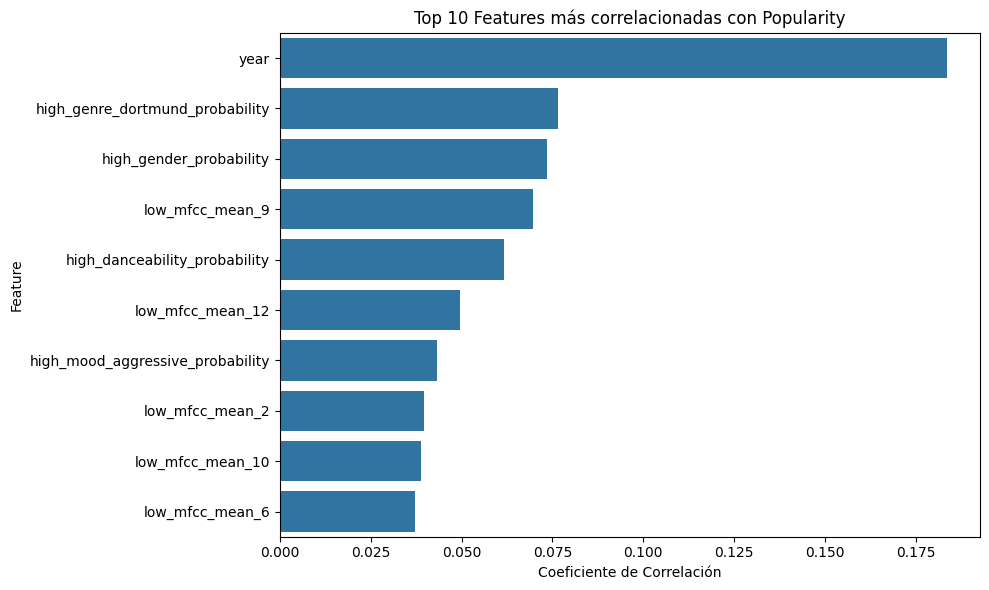

In [138]:
correlation_matrix = X_scaled.copy()
correlation_matrix['popularity'] = y 

correlation_with_popularity = correlation_matrix.corr()['popularity'].sort_values(ascending=False)

top_corr = correlation_with_popularity[1:11] 

plt.figure(figsize=(10,6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Features más correlacionadas con Popularity')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

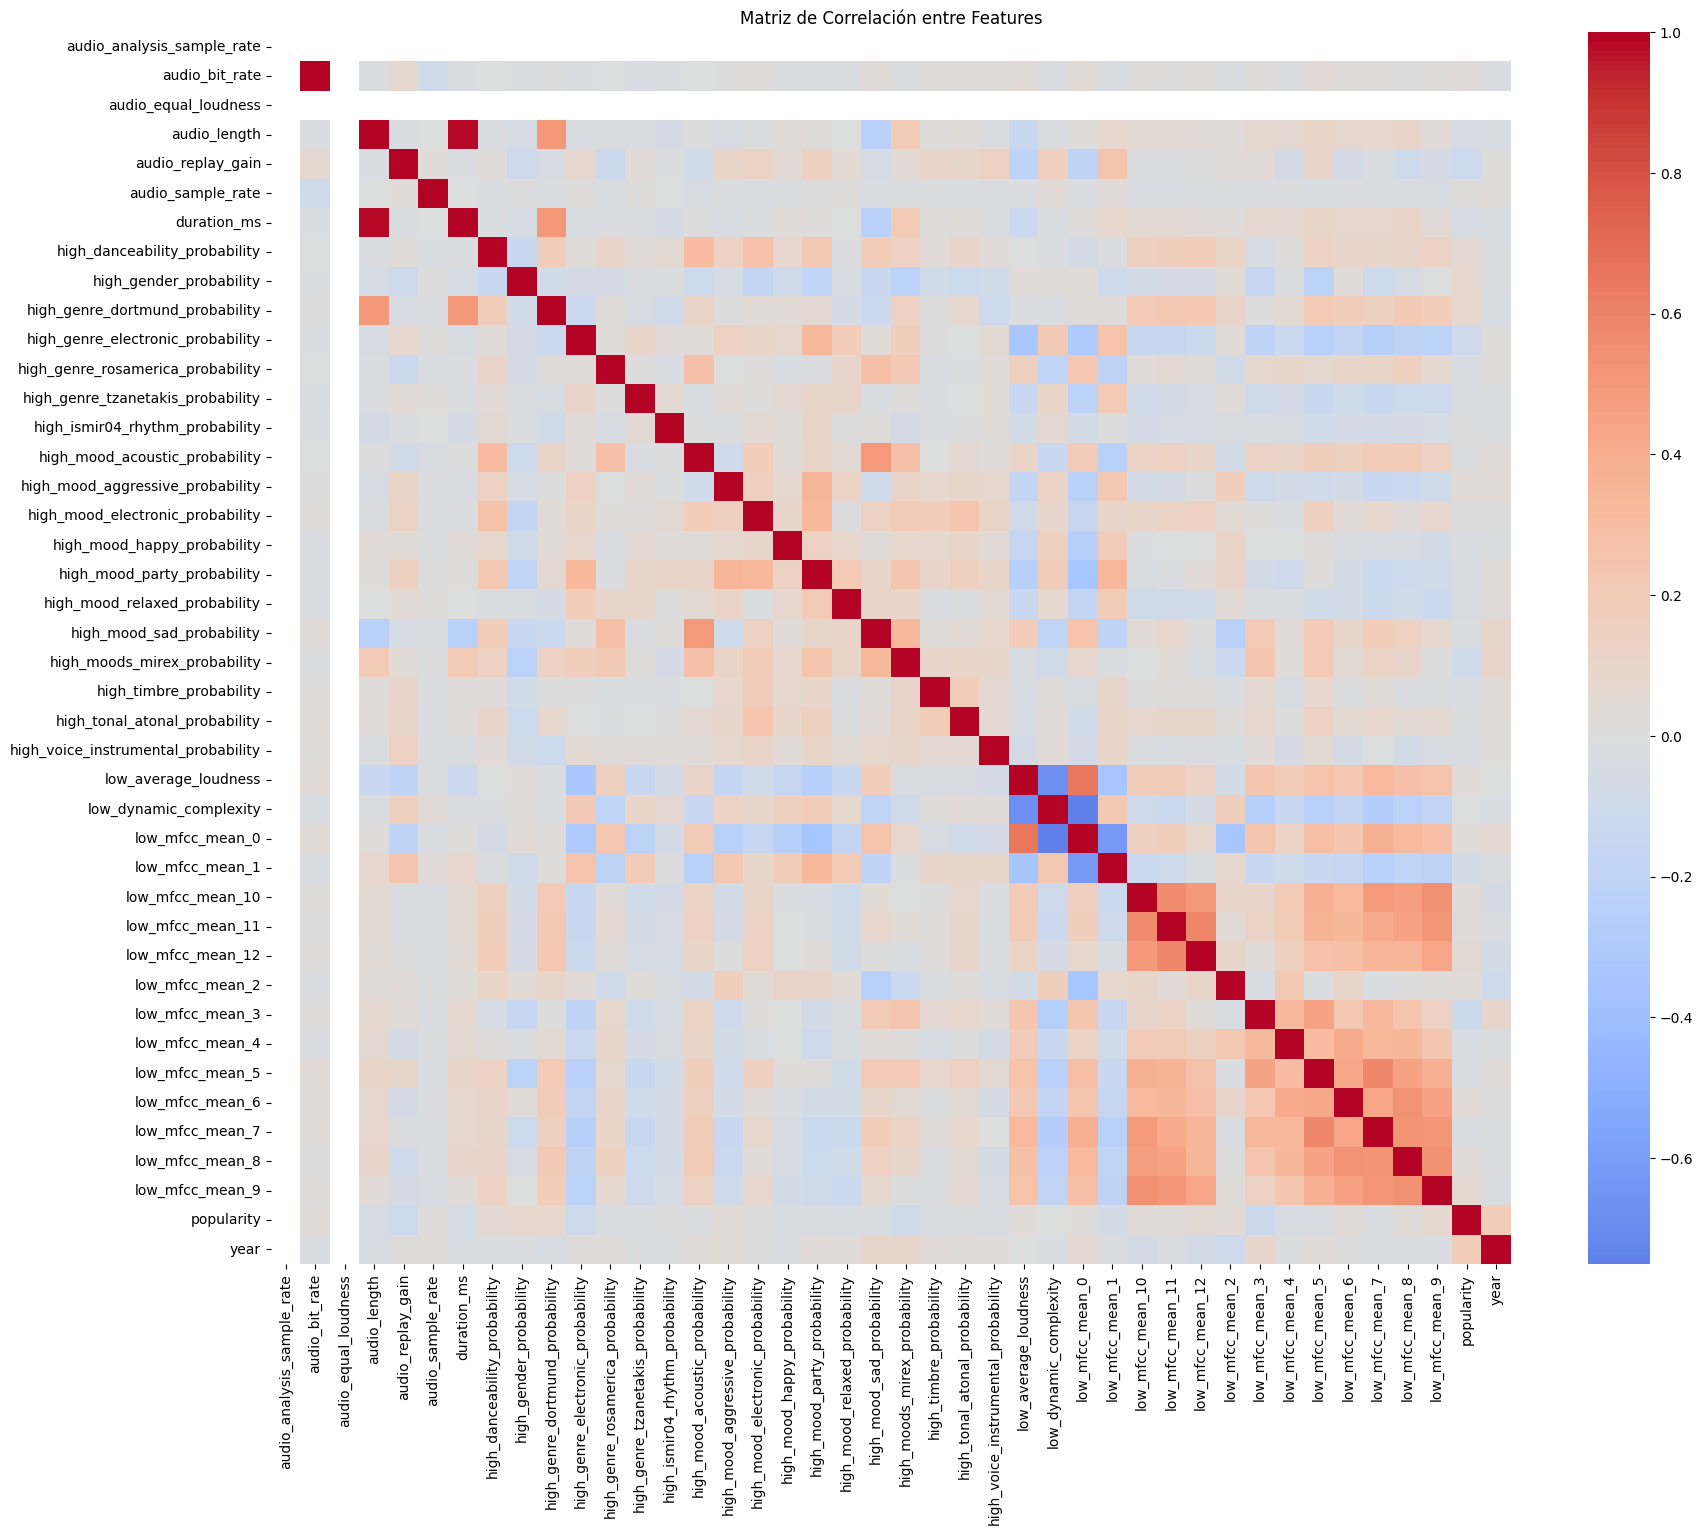

In [139]:
correlation_matrix = X.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")

plt.title('Matriz de Correlación entre Features')
plt.show()

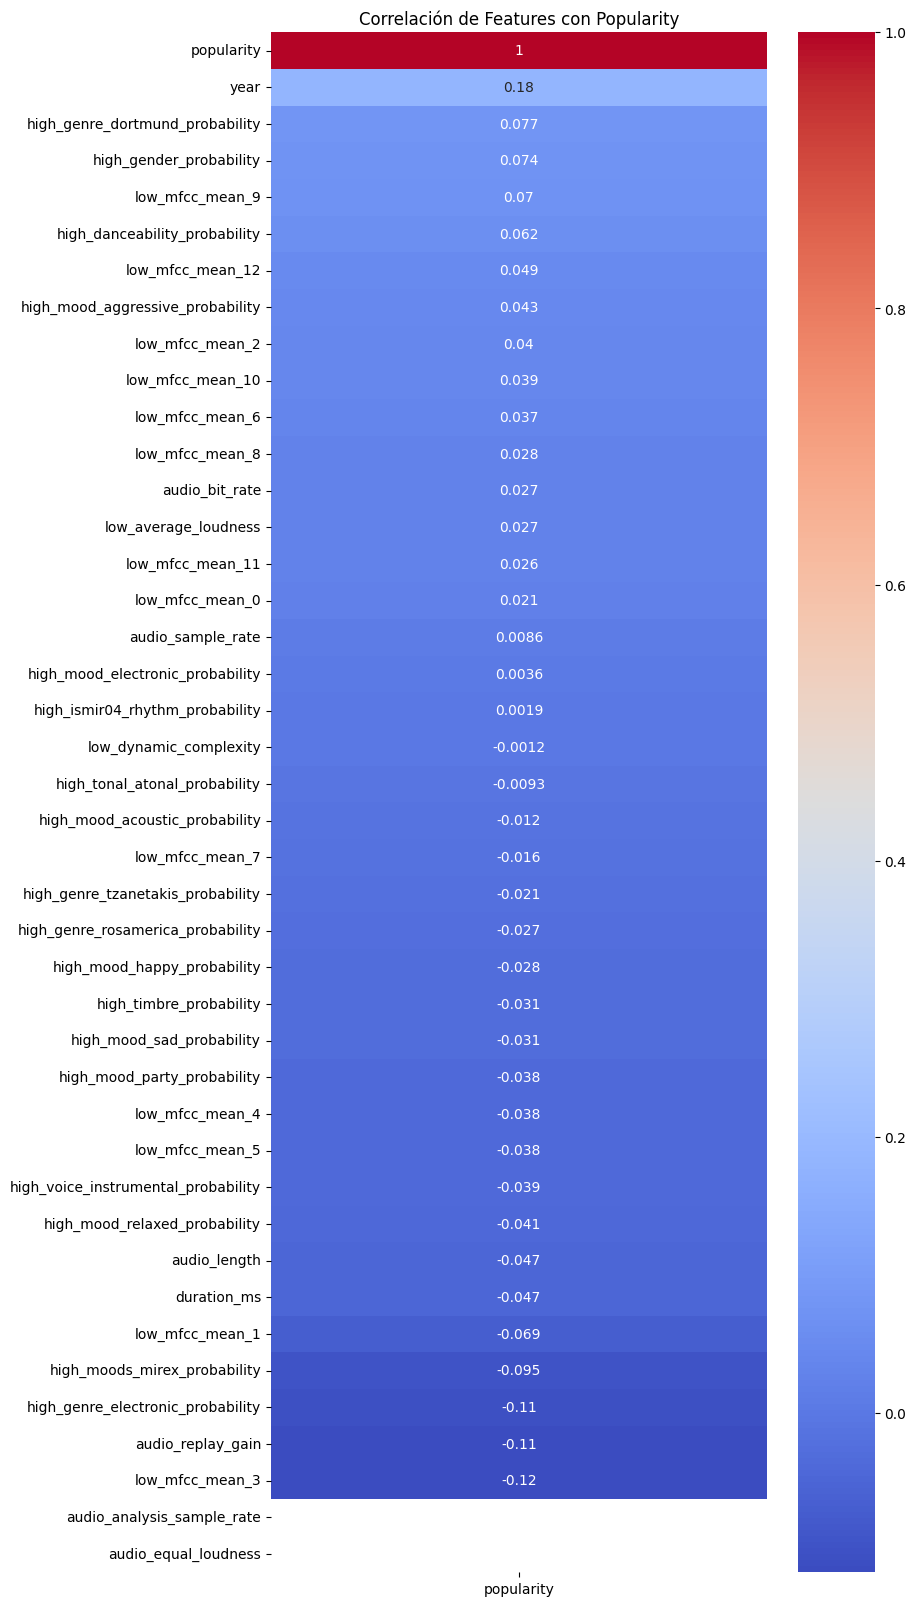

In [140]:
corr_with_popularity = X.corr()['popularity'].sort_values(ascending=False)

plt.figure(figsize=(8, 20))
sns.heatmap(corr_with_popularity.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlación de Features con Popularity')
plt.show()

In [141]:
X[['year', 'popularity']]
X[['year', 'popularity']].sort_values(by='popularity', ascending=False)

,year,popularity
41489,0.428571,1.000000
20891,1.000000,1.000000
41705,0.571429,1.000000
13856,0.571429,0.989362
41153,0.285714,0.978723
...,...,...
8235,0.285714,0.000000
22287,0.000000,0.000000
8233,0.285714,0.000000
8225,0.285714,0.000000


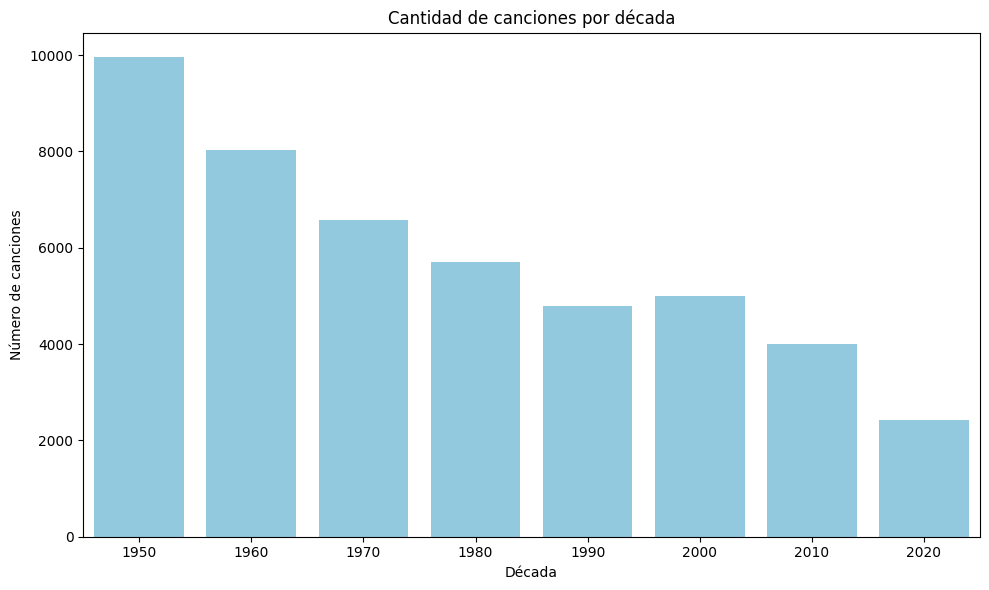

In [145]:
year_min = 1950
year_max = 2025

# Desnormaliza
X['year_real'] = X['year'] * (year_max - year_min) + year_min
X['year_real'] = X['year_real'].astype(int)

X['decade'] = (X['year_real'] // 10) * 10 


plt.figure(figsize=(10,6))
sns.countplot(data=X, x='decade', color='skyblue')
plt.xlabel("Década")
plt.ylabel("Número de canciones")
plt.title("Cantidad de canciones por década")
plt.tight_layout()
plt.show()

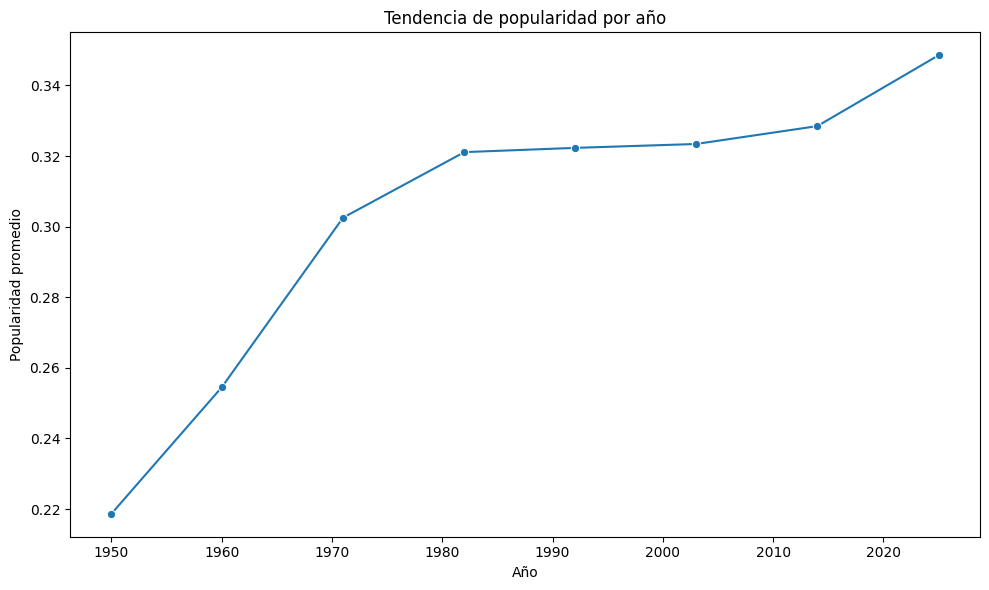

In [147]:
year_popularity = X.groupby('year_real')['popularity'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=year_popularity, x='year_real', y='popularity', marker='o')
plt.xlabel("Año")
plt.ylabel("Popularidad promedio")
plt.title("Tendencia de popularidad por año")
plt.tight_layout()
plt.show()